In [1]:
import pandas as pandas
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import models,layers

2025-04-13 06:20:10.845386: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744525211.054019      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744525211.115399      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
import cv2
import os

In [3]:
!pip install visualkeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 997.4/997.4 kB 18.8 MB/s eta 0:00:00a 0:00:01


In [4]:
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D,MaxPooling2D, Dense, Dropout,Flatten,Activation
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from keras.src.legacy.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint,ReduceLROnPlateau
from keras.utils import plot_model
from visualkeras import layered_view

In [5]:
train_path='/kaggle/input/gtsrb-german-traffic-sign/Train'
test_path='/kaggle/input/gtsrb-german-traffic-sign/Test'

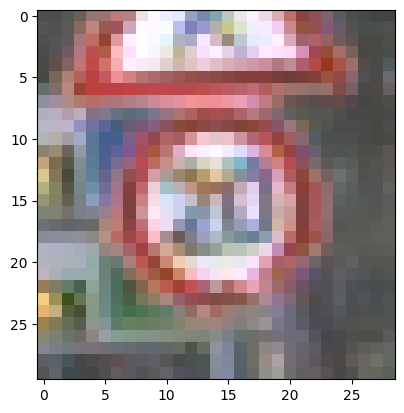

In [6]:
img=load_img(train_path+'/0/00000_00000_00000.png')
plt.imshow(img)
plt.show()

In [7]:
img=img_to_array(img)
img.shape

(30, 29, 3)

In [8]:
from glob import glob
classes=glob(train_path+"/*")
no_of_classes=len(classes)
no_of_classes

43

In [9]:
train_gen=ImageDataGenerator(rescale=1/255,validation_split=0.2)
val_gen=ImageDataGenerator(rescale=1/255,validation_split=0.2)
test_gen=ImageDataGenerator(rescale=1/255,rotation_range=40)
train_datagen=train_gen.flow_from_directory(train_path,target_size=(30,29),color_mode='rgb',class_mode='categorical')
val_datagen=val_gen.flow_from_directory(train_path,target_size=(30,29),color_mode='rgb',class_mode='categorical')
test_datagen=test_gen.flow_from_directory(test_path,target_size=(30,29),color_mode='rgb',class_mode='categorical')

Found 39209 images belonging to 43 classes.
Found 39209 images belonging to 43 classes.
Found 0 images belonging to 0 classes.


In [10]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(img.shape)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Conv2D(64,(3,3),input_shape=(img.shape)))
model.add(Activation('relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(43))
model.add(Activation('softmax'))
early_stopping=EarlyStopping(monitor='val_accuracy',restore_best_weights=True,mode='max',patience=3)

model_checkpoint=ModelCheckpoint(filepath='/content/drive/MyDrive/Data_science/Porfolio/best_model.keras',monitor='val_accuracy',mode='max')

lr_schedule=tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',min_lr=0.001)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1744525323.904076      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


In [11]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 27, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 28, 27, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 12, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 12, 11, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1920)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         122,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 43)                  │           5,547 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 43)                  │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 156,203 (610.17 KB)

 Trainable params: 156,203 (610.17 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
hist=model.fit(train_datagen,validation_data=val_datagen,callbacks=[model_checkpoint, early_stopping, lr_schedule],epochs=15)

Epoch 1/15


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1744525329.170928     117 service.cc:148] XLA service 0x79291c026ee0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1744525329.171797     117 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1744525329.459398     117 cuda_dnn.cc:529] Loaded cuDNN version 90300


   3/1226 ━━━━━━━━━━━━━━━━━━━━ 1:39 82ms/step - accuracy: 0.0417 - loss: 3.7684     

I0000 00:00:1744525331.587872     117 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1226/1226 ━━━━━━━━━━━━━━━━━━━━ 245s 195ms/step - accuracy: 0.3538 - loss: 2.3259 - val_accuracy: 0.9094 - val_loss: 0.3198 - learning_rate: 0.0010
Epoch 2/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 73s 59ms/step - accuracy: 0.8769 - loss: 0.3992 - val_accuracy: 0.9612 - val_loss: 0.1386 - learning_rate: 0.0010
Epoch 3/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 73s 59ms/step - accuracy: 0.9400 - loss: 0.2021 - val_accuracy: 0.9705 - val_loss: 0.1001 - learning_rate: 0.0010
Epoch 4/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 72s 58ms/step - accuracy: 0.9590 - loss: 0.1414 - val_accuracy: 0.9878 - val_loss: 0.0490 - learning_rate: 0.0010
Epoch 5/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 74s 60ms/step - accuracy: 0.9706 - loss: 0.1001 - val_accuracy: 0.9860 - val_loss: 0.0470 - learning_rate: 0.0010
Epoch 6/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 75s 61ms/step - accuracy: 0.9760 - loss: 0.0773 - val_accuracy: 0.9907 - val_loss: 0.0331 - learning_rate: 0.0010
Epoch 7/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 77s 63ms/step - accuracy: 0.978

In [14]:
hist.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])

In [15]:
acc=hist.history['accuracy']
loss=hist.history['loss']
val_acc=hist.history['val_accuracy']
val_loss=hist.history['val_loss']

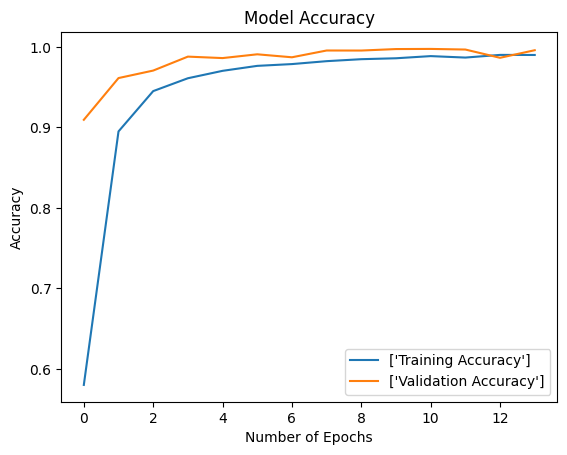

In [16]:
plt.plot(acc,label=['Training Accuracy'])
plt.plot(val_acc,label=['Validation Accuracy'])
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.show()

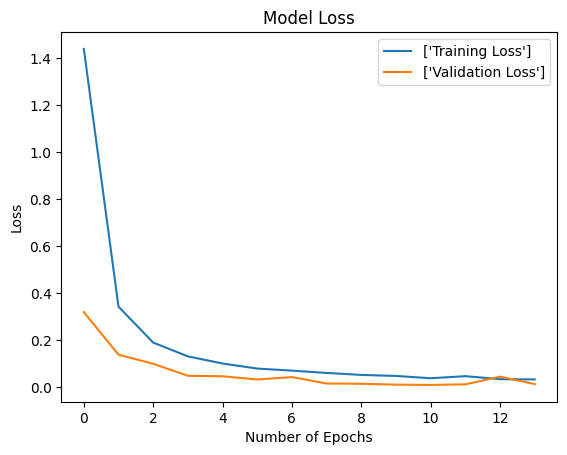

In [19]:
plt.plot(loss,label=['Training Loss'])
plt.plot(val_loss,label=['Validation Loss'])
plt.legend()
plt.xlabel('Number of Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

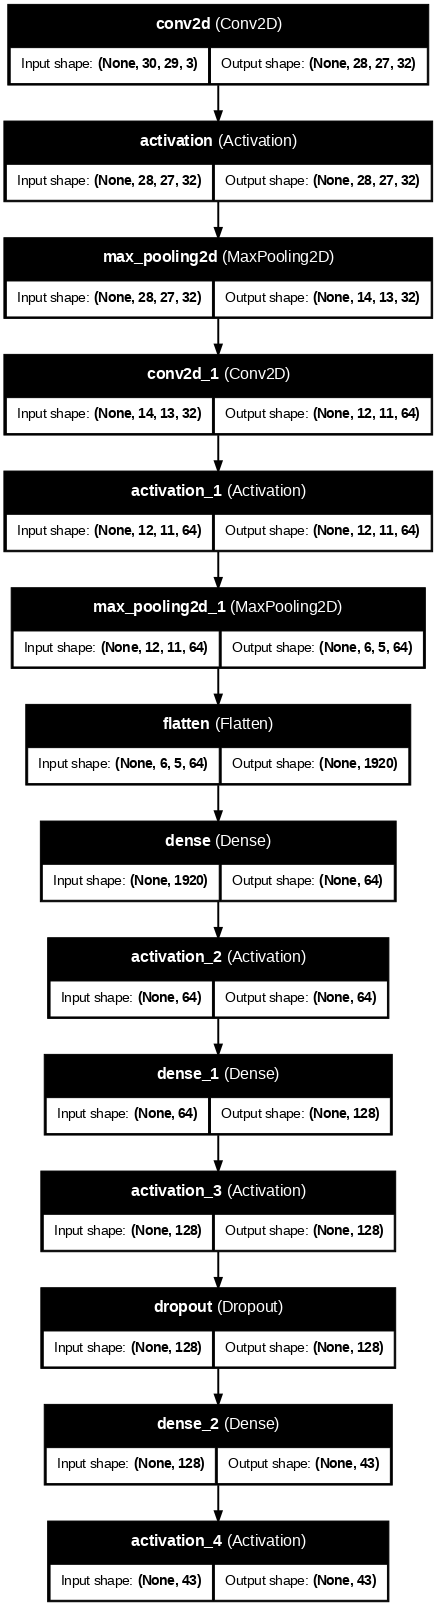

In [18]:
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True, dpi=70)

/usr/local/lib/python3.11/dist-packages/visualkeras/layered.py:86: UserWarning: The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.
  warnings.warn("The legend_text_spacing_offset parameter is deprecated and will be removed in a future release.")


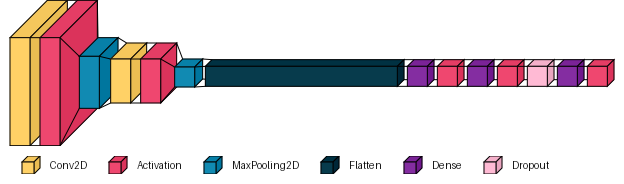

In [22]:
layered_view(model, to_file='model_visualkeras.png', legend=True, max_xy=500)